# **Optimizer Comparison**

In [1]:
Goal = """In this code I will experiment with several optimization algorithms (SGD, Adam, SGD with Momentum, RMSProp & Mini-Batch SGD) on two custom loss functions. 
The goal is to explore how different optimizers behave and converge (on a synthetic dataset and a custom loss function)."""


## Creating the Dataset

In [2]:
# data is in the form of: Y=w1*x1+w2*x2 (for 1000)
import numpy as np
from sklearn.model_selection import train_test_split

X=[]
Y=[]

w_1=np.random.randint(-1,1)+np.random.rand()
w_2=np.random.randint(-1,1)+np.random.rand()
for i in range(1000):
    x_1=np.random.randint(-1,1)+np.random.rand() #-1 or 0 + a random float(between 0-1)
    x_2=np.random.randint(-1,1)+np.random.rand()
    y=w_1*x_1+w_2*x_2
    X.append([x_1,x_2])
    Y.append(y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#chaniging the format to np.array will be usefull later
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

## Creating Loss Functions

In [3]:
def first_loss(ytrain, xtrain,w1,w2): # y: guessing based on optimizers / Y=real data
    y=[]
    for i in xtrain:
        y.append(w1*i[0]+w2*i[1])    
    y=np.array(y)
    return np.sum(-np.cos((y - ytrain) * 5)**3 - np.sin((y - ytrain) * 5)**2) / 2 / len(y)


def second_loss(ytrain, xtrain,w1,w2):
    y=[]
    for i in xtrain:
        y.append(w1*i[0]+w2*i[1])    
    y=np.array(y)
    return np.sum(np.sin((y - ytrain) * 12) * 1000) / 2 / len(y)

## Visualizing Optimizer Performance

### Gradient Functions & Data Shuffling

In [4]:
#for the first_loss
def grad1first_loss(ytrain, xtrain,w1,w2):
    y=[]
    for i in xtrain:
        y.append(w1*i[0]+w2*i[1])    
    y=np.array(y)
    return np.sum(-np.cos((y - ytrain) * 5)**2*(3*np.sin((y - ytrain)* 5)) - np.sin((y - ytrain) * 5)*(np.cos((y - ytrain) * 5)))*5*w1 / 2 / len(y)

def grad2first_loss(ytrain, xtrain,w1,w2):
    y=[]
    for i in xtrain:
        y.append(w1*i[0]+w2*i[1])    
    y=np.array(y)
    return np.sum(-np.cos((y - ytrain) * 5)**2*(3*np.sin((y - ytrain)* 5)) - np.sin((y - ytrain) * 5)*(np.cos((y - ytrain) * 5)))*5*w2 / 2 / len(y)

#for the second_loss
def grad1second_loss(ytrain, xtrain,w1,w2):
    y=[]
    for i in xtrain:
        y.append(w1*i[0]+w2*i[1])    
    y=np.array(y)
    return np.sum(np.cos((y - ytrain) * 12) * 1000) *12*w1 / 2 / len(y)

def grad2second_loss(ytrain, xtrain,w1,w2):
    y=[]
    for i in xtrain:
        y.append(w1*i[0]+w2*i[1])    
    y=np.array(y)
    return np.sum(np.cos((y - ytrain) * 12) * 1000) *12*w2 / 2 / len(y)

#for the most optimizer we nned to shuffle the x train data
def shuffle(xtrain,ytrain):
    permuted=np.random.permutation(len(xtrain)) # len(xtrain)=len(ytrain)
    return xtrain[permuted],ytrain[permuted]

### SGD

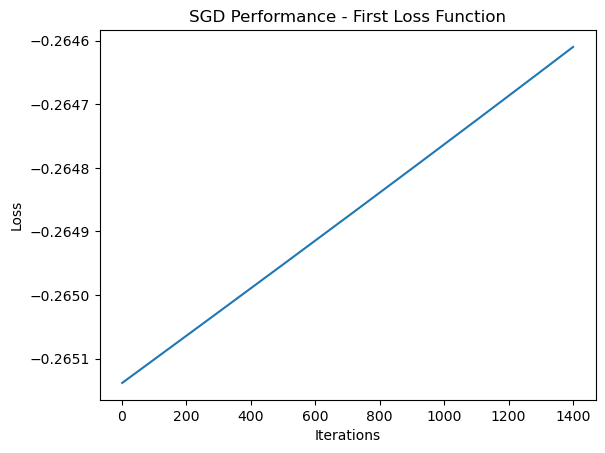

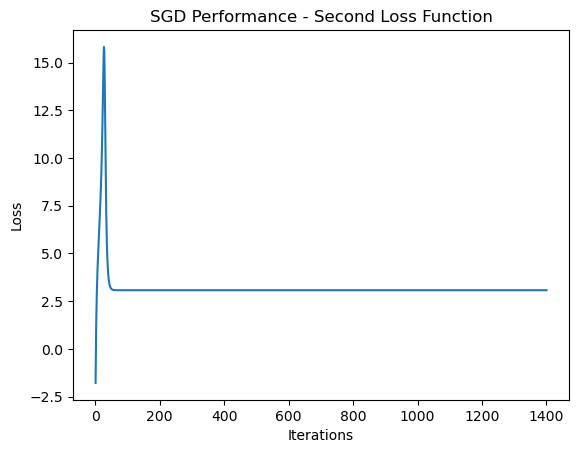

In [5]:
import matplotlib.pyplot as plt

def SGDfirst(lr,epochs,xtrain,ytrain):
    itr=0
    iteration=[] #the number of repeating each epochs
    loss=[]
    w1=np.random.rand()+np.random.randint(-1,1)
    w2=np.random.rand()+np.random.randint(-1,1)
    for i in range (epochs):
        x_train,y_train = shuffle(xtrain,ytrain) #stochastic
        for j in x_train:
            w1-=lr*grad1first_loss(y_train,x_train,w1,w2)
            w2-=lr*grad2first_loss(y_train,x_train,w1,w2)
            loss.append(first_loss(y_train, x_train,w1,w2))
            itr+=1
            iteration.append(itr)
    return(loss,iteration,w1,w2)

sgdfirst=SGDfirst(0.001,2,X_train,Y_train)
plt.plot(sgdfirst[1],sgdfirst[0])
plt.title("SGD Performance - First Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

#for the second loss

def SGDsecond(lr,epochs,xtrain,ytrain):
    itr=0
    iteration=[] #the number of repeating each epochs
    loss=[]
    w1=np.random.rand()+np.random.randint(-1,1)
    w2=np.random.rand()+np.random.randint(-1,1)
    for i in range (epochs):
        x_train,y_train = shuffle(xtrain,ytrain)
        for j in x_train:
            w1-=lr*grad1second_loss(y_train,x_train,w1,w2)
            w2-=lr*grad2second_loss(y_train,x_train,w1,w2)
            loss.append(second_loss(y_train, x_train,w1,w2))
            itr+=1
            iteration.append(itr)
    return(loss,iteration,w1,w2)

sgdsecond=SGDsecond(0.0001,2,X_train,Y_train)
plt.plot(sgdsecond[1],sgdsecond[0])
plt.title("SGD Performance - Second Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

### Adam

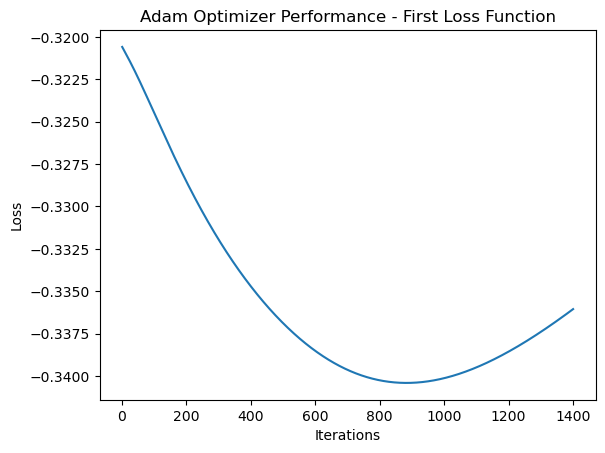

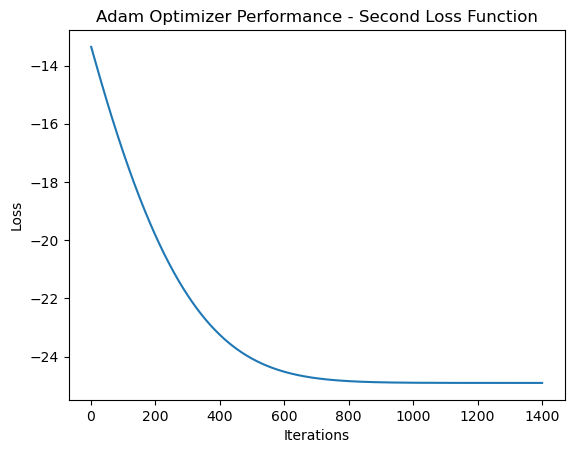

In [6]:
import matplotlib.pyplot as plt

def ADAMfirst(xtrain, ytrain, lr, epochs, beta1, beta2, epsilon):
    w1=np.random.rand()+np.random.randint(-1,1)
    w2=np.random.rand()+np.random.randint(-1,1)
    iter,loss=[],[]
    momentum, variance = 0, 0  
    t = 0
    momentum2,variance2=0,0
    for epoch in range(epochs):
        for i in range(len(xtrain)):
            t += 1
            momentum = beta1 * momentum + (1 - beta1) * grad1first_loss(ytrain, xtrain,w1,w2)
            m = momentum / (1 - beta1 ** t)
            variance = beta2 * variance + (1 - beta2) * (grad1first_loss(ytrain, xtrain,w1,w2) ** 2)
            v = variance / (1 - beta2 ** t)

            w1 -= lr * m / (np.sqrt(v) + epsilon)
            momentum2 = beta1 * momentum2 + (1 - beta1) * grad2first_loss(ytrain, xtrain,w1,w2)
            m2 = momentum2 / (1 - beta1 ** t)
            variance2 = beta2 * variance2 + (1 - beta2) * (grad2first_loss(ytrain, xtrain,w1,w2) ** 2)
            v2 = variance2 / (1 - beta2 ** t)
            w2 -= lr * m2 / (np.sqrt(v2) + epsilon)
            iter.append(t)
            loss.append(first_loss(ytrain, xtrain,w1,w2))
    return (loss,iter,(w1,w2))


adamfirst=ADAMfirst(X_train,Y_train, 0.0001, 2,0.9, 0.999, 1e-8)
plt.plot(adamfirst[1],adamfirst[0])
plt.title("Adam Optimizer Performance - First Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

#for the second loss
def ADAMsecond(xtrain, ytrain, lr, epochs, beta1, beta2, epsilon):
    w1=np.random.rand()+np.random.randint(-1,1)
    w2=np.random.rand()+np.random.randint(-1,1)
    iter,loss=[],[]
    momentum, variance = 0, 0  
    t = 0
    momentum2,variance2=0,0
    for epoch in range(epochs):
        for i in range(len(xtrain)):
            t += 1
            momentum = beta1 * momentum + (1 - beta1) * grad1second_loss(ytrain, xtrain,w1,w2)
            m = momentum / (1 - beta1 ** t)
            variance = beta2 * variance + (1 - beta2) * (grad1second_loss(ytrain, xtrain,w1,w2) ** 2)
            v = variance / (1 - beta2 ** t)

            w1 -= lr * m / (np.sqrt(v) + epsilon)
            momentum2 = beta1 * momentum2 + (1 - beta1) * grad2second_loss(ytrain, xtrain,w1,w2)
            m2 = momentum2 / (1 - beta1 ** t)
            variance2 = beta2 * variance2 + (1 - beta2) * (grad2second_loss(ytrain, xtrain,w1,w2) ** 2)
            v2 = variance2 / (1 - beta2 ** t)
            w2 -= lr * m2 / (np.sqrt(v2) + epsilon)
            iter.append(t)
            loss.append(second_loss(ytrain, xtrain,w1,w2))
    return (loss,iter,(w1,w2))


adamsecond=ADAMsecond(X_train,Y_train, 0.0001, 2,0.9, 0.999, 1e-8)
plt.plot(adamsecond[1],adamsecond[0])
plt.title("Adam Optimizer Performance - Second Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

### SGD with momentum

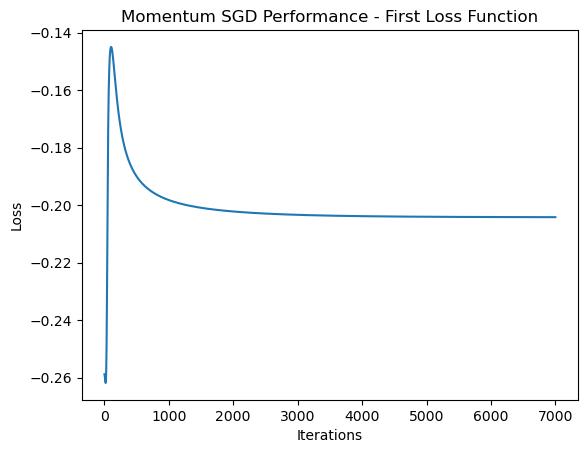

C:\Users\Maryam\AppData\Local\Temp\ipykernel_17276\1702017728.py:22: RuntimeWarning: overflow encountered in scalar multiply
  return np.sum(np.cos((y - ytrain) * 12) * 1000) *12*w1 / 2 / len(y)
C:\Users\Maryam\AppData\Local\Temp\ipykernel_17276\1702017728.py:29: RuntimeWarning: invalid value encountered in cos
  return np.sum(np.cos((y - ytrain) * 12) * 1000) *12*w2 / 2 / len(y)


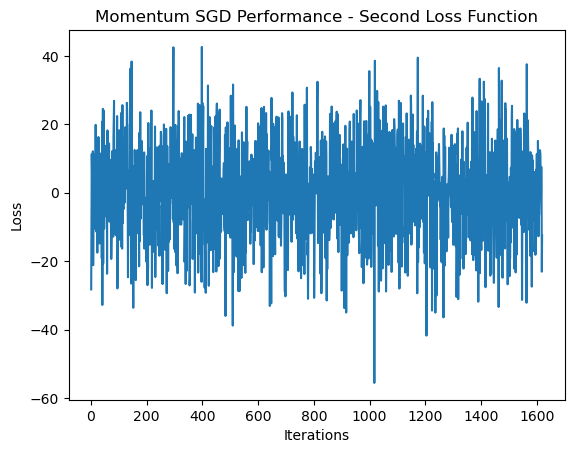

In [7]:
import matplotlib.pyplot as plt

def SGDwMOMNTUMfirst(xtrain, ytrain, lr, epochs, beta):
    w1=np.random.rand()+np.random.randint(-1,1)
    w2=np.random.rand()+np.random.randint(-1,1)
    iteration=[]
    loss=[]
    iter=0
    variance1,variance2=0,0
    for epoch in range(epochs):
        for i in range(len(xtrain)): 
            iter+=1           
            # Update velocity and parameter
            variance1 = beta * variance1 + lr * grad1first_loss(ytrain, xtrain,w1,w2)
            w1 -= variance1
            variance2 = beta * variance2 + lr * grad2first_loss(ytrain, xtrain,w1,w2)
            w2 -= variance2
            iteration.append(iter)
            loss.append(first_loss(ytrain,xtrain,w1,w2))
    return (loss,iteration,(w1,w2))

sgdmomnetumfirst=SGDwMOMNTUMfirst(X_train,Y_train,0.01,10,0.9)
plt.plot(sgdmomnetumfirst[1],sgdmomnetumfirst[0])
plt.title("Momentum SGD Performance - First Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

#for the second loss

def SGDwMOMNTUMsecond(xtrain, ytrain, lr, epochs, beta):
    w1=np.random.rand()+np.random.randint(-1,1)
    w2=np.random.rand()+np.random.randint(-1,1)
    iteration=[]
    loss=[]
    iter=0
    variance1,variance2=0,0
    for epoch in range(epochs):
        for i in range(len(xtrain)): 
            iter+=1           
            # Update velocity and parameter
            variance1 = beta * variance1 + lr * grad1second_loss(ytrain, xtrain,w1,w2)
            w1 -= variance1
            variance2 = beta * variance2 + lr * grad2second_loss(ytrain, xtrain,w1,w2)
            w2 -= variance2
            iteration.append(iter)
            loss.append(second_loss(ytrain,xtrain,w1,w2))
    return (loss,iteration,(w1,w2))


sgdmomnetumsecond=SGDwMOMNTUMsecond(X_train,Y_train,0.01,50,0.9)
plt.plot(sgdmomnetumsecond[1],sgdmomnetumsecond[0])
plt.title("Momentum SGD Performance - Second Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

### RMS prop

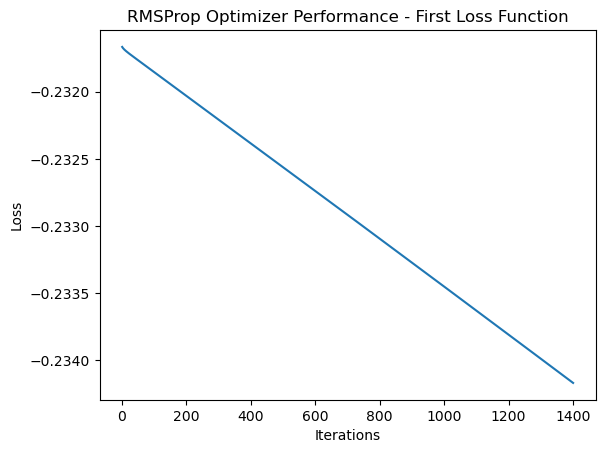

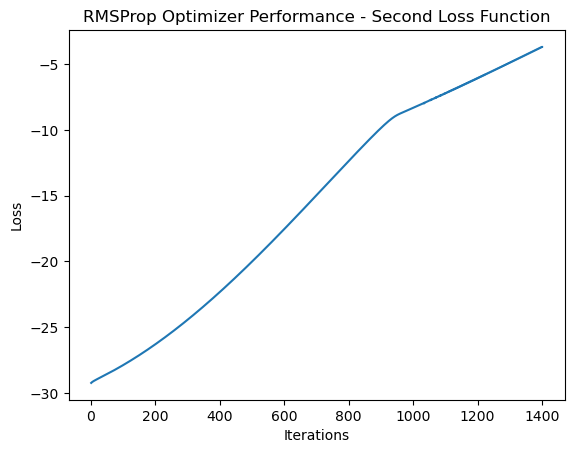

In [8]:
def RMSPROPfirst(xtrain,ytrain,lr,epochs,beta,epsilon):
    w1=np.random.rand()+np.random.randint(-1,1)
    w2=np.random.rand()+np.random.randint(-1,1)
    avggradsquared1 = 0  
    avggradsquared2 = 0
    iteration,loss=[],[]
    iter=0
    for epoch in range(epochs):
        for i in range(len(xtrain)):   
            iter+=1         
            avggradsquared1 = beta * avggradsquared1 + (1 - beta) * grad1first_loss(ytrain, xtrain,w1,w2) ** 2
            w1 -= lr * grad1first_loss(ytrain, xtrain,w1,w2) / (np.sqrt(avggradsquared1) + epsilon)
            avggradsquared2 = beta * avggradsquared2 + (1 - beta) * grad2first_loss(ytrain, xtrain,w1,w2) ** 2
            w2 -= lr * grad2first_loss(ytrain, xtrain,w1,w2) / (np.sqrt(avggradsquared2) + epsilon)
            iteration.append(iter)
            loss.append(first_loss(ytrain,xtrain,w1,w2))
    return (loss,iteration,(w1,w2))


rmspropfirst=RMSPROPfirst(X_train,Y_train,0.00001,2,0.9,1e-8)
plt.plot(rmspropfirst[1],rmspropfirst[0])
plt.title("RMSProp Optimizer Performance - First Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

#for the second loss

def RMSPROPsecond(xtrain,ytrain,lr,epochs,beta,epsilon):
    w1=np.random.rand()+np.random.randint(-1,1)
    w2=np.random.rand()+np.random.randint(-1,1)
    avggradsquared1 = 0  # Initialize squared gradient moving average
    avggradsquared2 = 0
    iteration,loss=[],[]
    iter=0
    for epoch in range(epochs):
        for i in range(len(xtrain)):   
            iter+=1         
            avggradsquared1 = beta * avggradsquared1 + (1 - beta) * grad1second_loss(ytrain, xtrain,w1,w2) ** 2
            w1 -= lr * grad1second_loss(ytrain, xtrain,w1,w2) / (np.sqrt(avggradsquared1) + epsilon)
            avggradsquared2 = beta * avggradsquared2 + (1 - beta) * grad2second_loss(ytrain, xtrain,w1,w2) ** 2
            w2 -= lr * grad2second_loss(ytrain, xtrain,w1,w2) / (np.sqrt(avggradsquared2) + epsilon)
            iteration.append(iter)
            loss.append(second_loss(ytrain,xtrain,w1,w2))
    return (loss,iteration,(w1,w2))


rmspropsecond=RMSPROPsecond(X_train,Y_train,0.0001,2,0.9,1e-8)
plt.plot(rmspropsecond[1],rmspropsecond[0])
plt.title("RMSProp Optimizer Performance - Second Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

### SGD with mini batches

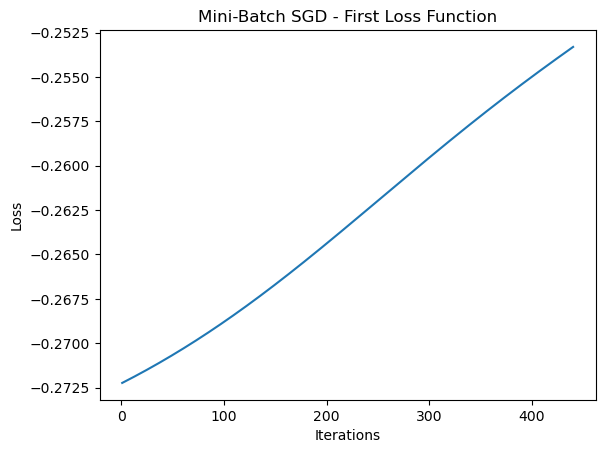

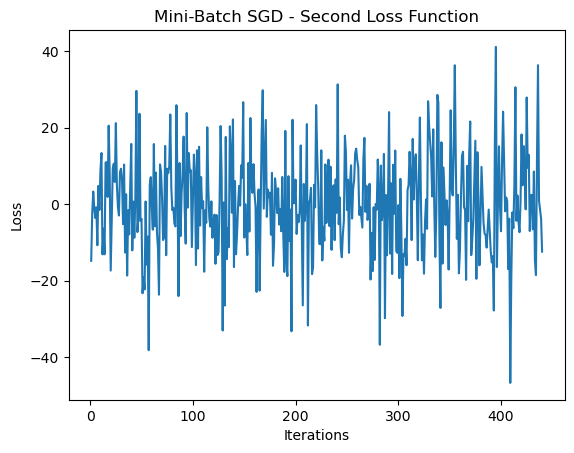

In [9]:
def SGDwMINIBATCHESfirst(xtrain, ytrain,lr,epochs,size):
    w1=np.random.rand()+np.random.randint(-1,1)
    w2=np.random.rand()+np.random.randint(-1,1)
    n = len(xtrain)
    iteration,loss=[],[]
    iter=0
    for epoch in range(epochs):
        xshuffled, yshuffled=shuffle(xtrain,ytrain)
        for i in range(0, n, size):
            iter+=1
            xbatch = xshuffled[i:i+size]
            ybatch = yshuffled[i:i+size]
            w1 -= lr * grad1first_loss(ytrain, xtrain,w1,w2)
            w2 -= lr * grad2first_loss(ytrain, xtrain,w1,w2)
            iteration.append(iter)
            loss.append(first_loss(ytrain,xtrain,w1,w2))
    return (loss,iteration,(w1,w2))

sgdbatchesfirst=SGDwMINIBATCHESfirst(X_train,Y_train,0.01,20, 32)
plt.plot(sgdbatchesfirst[1],sgdbatchesfirst[0])
plt.title("Mini-Batch SGD - First Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


#for the second loss

def SGDwMINIBATCHESsecond(xtrain, ytrain,lr,epochs,size):
    w1=np.random.rand()+np.random.randint(-1,1)
    w2=np.random.rand()+np.random.randint(-1,1)
    n = len(xtrain)
    iteration,loss=[],[]
    iter=0
    for epoch in range(epochs):

        indices = np.random.permutation(n)
        xshuffled, yshuffled=shuffle(xtrain,ytrain)
        for i in range(0, n, size):
            iter+=1
            xbatch = xshuffled[i:i+size]
            ybatch = yshuffled[i:i+size]
            w1 -= lr * grad1second_loss(ytrain, xtrain,w1,w2)
            w2 -= lr * grad2second_loss(ytrain, xtrain,w1,w2)
            iteration.append(iter)
            loss.append(second_loss(ytrain,xtrain,w1,w2))
    return (loss,iteration,(w1,w2))
sgdbatchessecond=SGDwMINIBATCHESsecond(X_train,Y_train,0.01,20, 32)
plt.plot(sgdbatchessecond[1],sgdbatchessecond[0])
plt.title("Mini-Batch SGD - Second Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()